# Assignment 12- Model Tuning

This assignment again goes through the model building process for both the "titanic" and "adult" data sets. Instead of splitting the data into training and testing data to measure the accuracy though, cross validation is used. Multiple combinations of different hyperparameters are used when training the model as well which makes this code take more time to run. A random forest is also trained in this code

### 1.	Preprocess the data so that it is ready to train predictive models.

In [1]:
#Upload adult data set
getwd()
setwd("C:/Users/student/Documents/Data Analysis Practice Data Sets")
adult <- read.csv("adult_data.csv", header = FALSE, na.strings = " ?")
names(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "class")
colnames(adult)[colnames(adult) =="class"] <- "target"
adult$target = factor(adult$target)

#Upload titanic data set
getwd()
setwd("C:/Users/student/Documents/Data Analysis Practice Data Sets/Titanic Practice")
titanic <- read.csv("train.csv")
titanic$PassengerId = NULL
titanic$Name = NULL
titanic$Ticket = NULL
titanic$Cabin = NULL
titanic$Survived = factor(titanic$Survived)
titanic$Pclass = factor(titanic$Pclass)
colnames(titanic)[colnames(titanic) == "Survived"] <- "target"

#Clean categorical variables
most_frequent <- function(x){
   unique_x <- unique(x)
   unique_x[which.max(tabulate(match(x, unique_x)))]
}

cat.data.cleaning <- function(data)
{
  for (i in which(sapply(data, is.factor))){
        data[is.na(data[,i]), i] <- most_frequent(data[,i])
    }
  return(data)
}

adult <- cat.data.cleaning(adult)
titanic <- cat.data.cleaning(titanic)

#Impute data
impute <- function(data)
{
  library(caret)
  data_preProcess <- preProcess(data, method = "medianImpute")
  data <- data.frame(predict(data_preProcess, newdata = data))
  return(data)
}

adult <- impute(adult)
titanic <- impute(titanic)

#Simplify categories into fewer groups
adult$education_new[adult$education %in% c(" 1st-4th", " 5th-6th", 
                                                       " 7th-8th", " 9th", " 10th",
                                                        " 11th", " 12th", 
                                                        " Preschool")] <- " Dropout"
adult$education_new[adult$education %in% c(" HS-grad")] <- " HS-grad"
adult$education_new[adult$education %in% c(" Assoc-acdm", " Assoc-voc", 
                                                      " Some-college")] <- " Some-college"
adult$education_new[adult$education %in% c(" Bachelors")] <- " Bachelors"
adult$education_new[adult$education %in% c(" Doctorate", " Masters", 
                                                        " Prof-school")] <- " Post_grad_schooling"
adult$education_new <- as.factor(adult$education_new)

#occupation
#levels(adult$occupation)
adult$occupation_new <- ifelse(adult$occupation %in% c( " Protective-serv", 
                                                                    " Armed-Forces"),
                                                                    " Safety_or_Forces", NA)
adult$occupation_new[adult$occupation %in% c(" Tech-support"," Machine-op-inspct",
                                             " Craft-repair")] <- " Tech_engineer"
adult$occupation_new[adult$occupation %in% c(" Sales", 
                                            " Exec-managerial", " Adm-clerical", 
                                            " Prof-specialty", " Other-service")] <- " Office_job"
adult$occupation_new[adult$occupation %in% c(" Farming-fishing", " Handlers-cleaners",
                                            " Priv-house-serv",
                                            " Transport-moving")] <- " Blue_collar"
adult$occupation_new <- as.factor(adult$occupation_new)

#native country
library(countrycode)
adult$native_continent <- factor(countrycode(sourcevar = adult[,"native_country"],
                                 origin = "country.name",
                                 destination = "continent"))

adult$native_country = NULL
adult$education = NULL
adult$occupation = NULL


[1] "C:/Users/student/Documents/Junior S1/Statistical Analysis with R/Modeling"

[1] "C:/Users/student/Documents/Data Analysis Practice Data Sets"

Loading required package: lattice
Loading required package: ggplot2


### 2. Train a random forest with 7-fold cross validation.  Report the accuracy of the forest.

In [2]:
library(caret)
library(ranger)

myGrid <- expand.grid(mtry = 2,
                       splitrule = c("gini"),
                       min.node.size = (c(1:5)))

set.seed(123)
adult_rf <- train(target ~ ., data = adult, method = "ranger", 
              trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE),
                              tuneGrid = myGrid)

set.seed(123)
titanic_rf <- train(target ~ ., data = titanic, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE), 
                              tuneGrid = myGrid)

confusionMatrix(adult_rf)
confusionMatrix(titanic_rf)

+ Fold1: mtry=2, splitrule=gini, min.node.size=1 
- Fold1: mtry=2, splitrule=gini, min.node.size=1 
+ Fold1: mtry=2, splitrule=gini, min.node.size=2 
- Fold1: mtry=2, splitrule=gini, min.node.size=2 
+ Fold1: mtry=2, splitrule=gini, min.node.size=3 
- Fold1: mtry=2, splitrule=gini, min.node.size=3 
+ Fold1: mtry=2, splitrule=gini, min.node.size=4 
- Fold1: mtry=2, splitrule=gini, min.node.size=4 
+ Fold1: mtry=2, splitrule=gini, min.node.size=5 
- Fold1: mtry=2, splitrule=gini, min.node.size=5 
+ Fold2: mtry=2, splitrule=gini, min.node.size=1 
- Fold2: mtry=2, splitrule=gini, min.node.size=1 
+ Fold2: mtry=2, splitrule=gini, min.node.size=2 
- Fold2: mtry=2, splitrule=gini, min.node.size=2 
+ Fold2: mtry=2, splitrule=gini, min.node.size=3 
- Fold2: mtry=2, splitrule=gini, min.node.size=3 
+ Fold2: mtry=2, splitrule=gini, min.node.size=4 
- Fold2: mtry=2, splitrule=gini, min.node.size=4 
+ Fold2: mtry=2, splitrule=gini, min.node.size=5 
- Fold2: mtry=2, splitrule=gini, min.node.size=5 


Cross-Validated (7 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction  <=50K  >50K
     <=50K   73.5  14.1
     >50K     2.4  10.0
                            
 Accuracy (average) : 0.8354


Cross-Validated (7 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    0    1
         0 57.9 13.4
         1  3.7 25.0
                            
 Accuracy (average) : 0.8294


### 3. Train a decision tree with 10-fold cross validation.  Report the accuracy. 

In [3]:
#myGridTree <- expand.grid(cp = 5)

set.seed(123)
adultDT <- train(target~.,data = adult, method = "rpart", 
             trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE))

set.seed(123)
titanicDT <- train(target~.,data = titanic, method = "rpart", 
             trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE))

confusionMatrix(adultDT)
confusionMatrix(titanicDT)

+ Fold01: cp=0.03686 
- Fold01: cp=0.03686 
+ Fold02: cp=0.03686 
- Fold02: cp=0.03686 
+ Fold03: cp=0.03686 
- Fold03: cp=0.03686 
+ Fold04: cp=0.03686 
- Fold04: cp=0.03686 
+ Fold05: cp=0.03686 
- Fold05: cp=0.03686 
+ Fold06: cp=0.03686 
- Fold06: cp=0.03686 
+ Fold07: cp=0.03686 
- Fold07: cp=0.03686 
+ Fold08: cp=0.03686 
- Fold08: cp=0.03686 
+ Fold09: cp=0.03686 
- Fold09: cp=0.03686 
+ Fold10: cp=0.03686 
- Fold10: cp=0.03686 
Aggregating results
Selecting tuning parameters
Fitting cp = 0.0369 on full training set
+ Fold01: cp=0.02339 
- Fold01: cp=0.02339 
+ Fold02: cp=0.02339 
- Fold02: cp=0.02339 
+ Fold03: cp=0.02339 
- Fold03: cp=0.02339 
+ Fold04: cp=0.02339 
- Fold04: cp=0.02339 
+ Fold05: cp=0.02339 
- Fold05: cp=0.02339 
+ Fold06: cp=0.02339 
- Fold06: cp=0.02339 
+ Fold07: cp=0.02339 
- Fold07: cp=0.02339 
+ Fold08: cp=0.02339 
- Fold08: cp=0.02339 
+ Fold09: cp=0.02339 
- Fold09: cp=0.02339 
+ Fold10: cp=0.02339 
- Fold10: cp=0.02339 
Aggregating results
Selecting t

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction  <=50K  >50K
     <=50K   72.0  12.2
     >50K     3.9  11.9
                            
 Accuracy (average) : 0.8388


Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    0    1
         0 54.4 11.4
         1  7.2 26.9
                            
 Accuracy (average) : 0.8137


### 4.	What are the selection of the hyperparameters (mtry, splitrule, min.mode.size) in the random forest in 2? 

For the random forest in number two, mtry is set to 2, splitrule is set to gini, and the min.node.size is set to between 1 and 5. The mtry specifies the number of variables to select at each split. The number 2 was selected in order to decrease the complexity of the model and therefore decrease the run time. The split rule of gini specifies to use the Gini Index method to decide where the splits in the tree will occur. Finally, the min.node.size selection tells R the minimum number of observations that should occur in each node.

### 5. Print out the plot of the random forest.

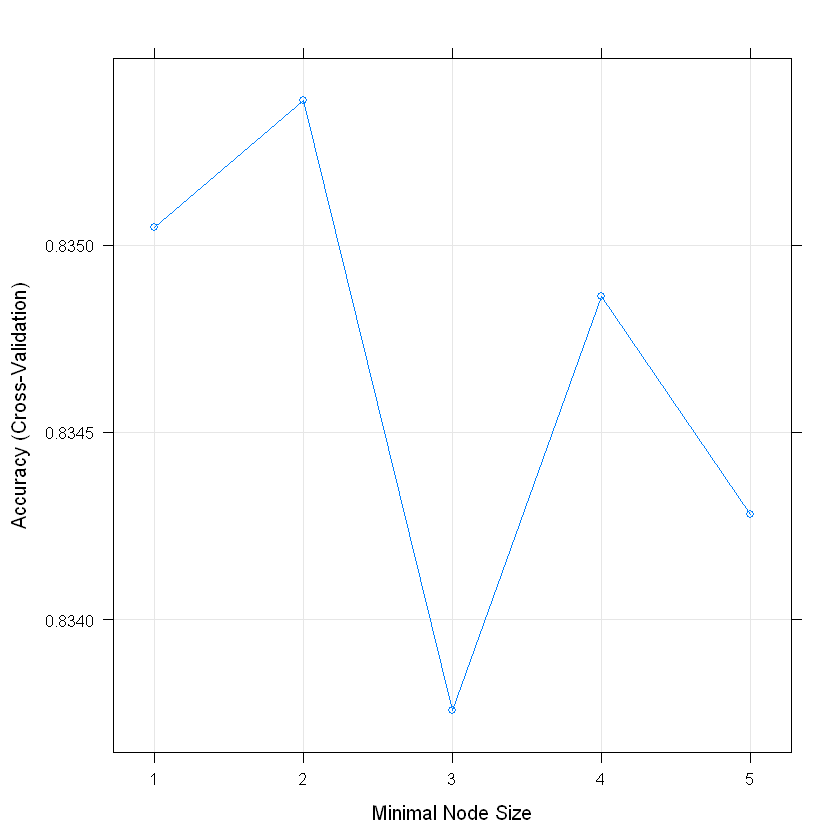

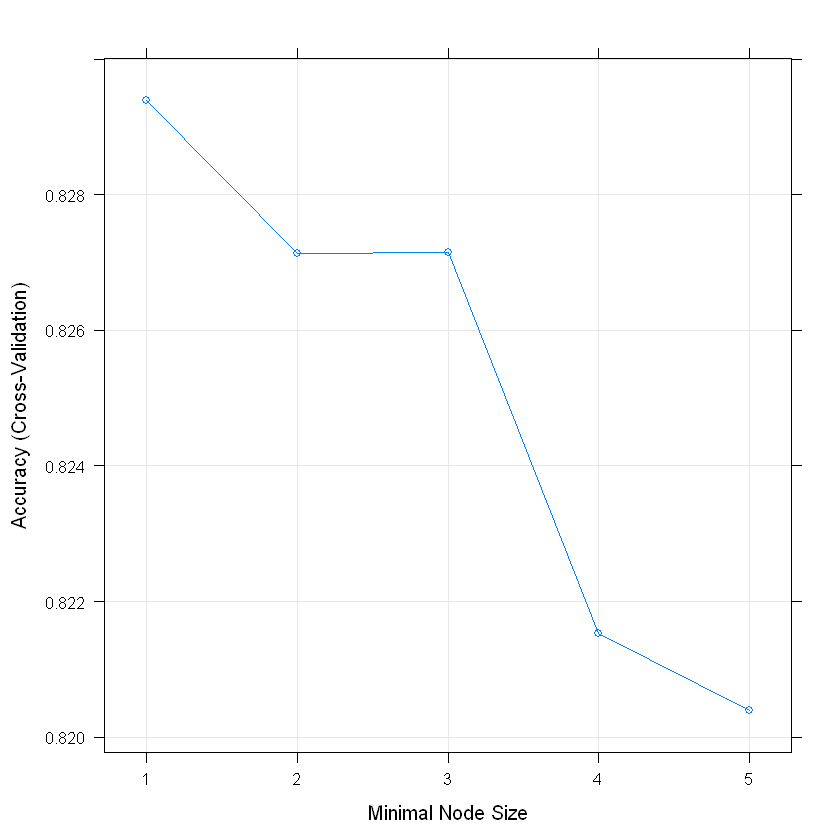

In [4]:
plot(adult_rf)
plot(titanic_rf)

### 6. Tune the three hyperparameters of the random forest with mtry running all its possible values, splitrule running all its possible values (gini and extratrees) and min.node.size running from 1 to 20 (adjust as necessary to run faster)

In [ ]:
myGridAdult <- expand.grid(mtry = c(1:ncol(adult)),
                       splitrule = c("gini", "extratrees"),
                       min.node.size = (c(1:4)))

set.seed(123)
adult_hyper <- train(target ~ ., data = adult, method = "ranger", 
              trControl = trainControl(method ="cv", number = 3, verboseIter = TRUE),
                              tuneGrid = myGridAdult)

myGridTitanic <- expand.grid(mtry = c(1:ncol(titanic)),
                       splitrule = c("gini", "extratrees"),
                       min.node.size = (c(1:4)))

set.seed(123)
titanic_hyper <- train(target ~ ., data = titanic, method = "ranger", 
               trControl = trainControl(method ="cv", number = 3, verboseIter = TRUE), 
                              tuneGrid = myGridTitanic)

### 7.	Print out the tuning plot of the random forest.  Does your tuned random forest in 6 achieve better accuracy than the default random forest in 2? 

In [ ]:
plot(adult_hyper)
plot(titanic_hyper)
confusionMatrix(adult_hyper)
confusionMatrix(titanic_hyper)

The random forest model with tuning parameters outperformed the default random forest model for both the titanic model and adult model. The adult model improved from 0.8357 to 0.8623 while the titanic mode improved from 0.8283 to 0.8316. The improvements in the titanic model are probably not justified by the length of time the program took to run but the improvements in the adult model are likely worth the run time. 

### 8. Compare the performances of the default glmnet model and a tuned glmnet model. Do you achieve better performance in the tuned glmnet model? 

In [ ]:
library(glmnet)

set.seed(123)

#Default
adult_glmnet_default <- train(target ~ ., adult, 
                              method = "glmnet")

titanic_glmnet_default <- train(target ~ ., titanic, 
                                method = "glmnet")

#Tuned
set.seed(123)

myControl <- trainControl(method = "cv", 
                          number = 5,
                          classProbs = FALSE,
                          verboseIter = TRUE)

myGrid2 <- expand.grid(alpha = seq(0, 1, .2),
                      lambda = seq(0.001, 2, length = 15))

adult_glmnet_tuned <- train(target ~ ., adult, 
                            method = "glmnet", 
                            trControl = myControl,
                            tuneGrid = myGrid2)

titanic_glmnet_tuned <- train(target ~ ., titanic, 
                              method = "glmnet", 
                              trControl = myControl,
                              tuneGrid = myGrid2)

confusionMatrix(adult_glmnet_default)
confusionMatrix(adult_glmnet_tuned)

confusionMatrix(titanic_glmnet_default)
confusionMatrix(titanic_glmnet_tuned)

Customizing the tuning resulted in a slightly more accurate model for the titanic data set while barely improved the accuracy of the model for the adult data set. The accuracy of the titanic model improved from 0.7997 to 0.8103 while the adult model only improved from 0.8474 to 0.8475.